# We Rate Dogs Project

## Content
* [Data Wrangling](#wrangle)
    * [Data Gathering](#gather)
    * [Data Assessing](#assess)
    * [Data Cleaning](#clean)
* [Data Exploration](#explore)
* [Data Visualization](#visual)
* [Data storing](#store)

In [104]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sb
import tweepy
from timeit import default_timer as timer
from IPython.display import Image

%matplotlib inline

<a id='wrangle'></a>
## Data Wrangling

<a id='gather'></a>
### Data Gathering

In [105]:
# create the archive dataframe from csv file
df_archive = pd.read_csv('data/twitter_archive_enhanced.csv')

In [106]:
# getting the file using requests package
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions = requests.get(link)

# write the file in local disk 
with open('data/image_predictions.tsv', mode='wb') as file:
    file.write(image_predictions.content)
    
# create the image predictions dataframe from tsv file    
df_image_predictions = pd.read_csv('data/image_predictions.tsv', sep='\t')

In [4]:
consumer_key = 'OmxaysFkYFeRNmPaAZJkQngYp'
consumer_secret = 'nHl3EdvBLjR5iZjHvEWGKxb5wifWsmERkYiajZ5RazTnHlsB3c'
access_token = '2183404703-ibkTtOx5WtM5Vm8F8zeVZBBAXS4zaUIUyVDlux4'
access_secret = 'UUUyqTXPWkIVpInDKZhLBGRpNIodLWXD7wav2ZYLMx2nX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('data/tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Fail
1045: 743609206067040256
Fail
1046: 743595368194129920
Fail
1047: 743545585370791937
Fail
1048: 743510151680958465
Fail
1049: 743253157753532416
Fail
1050: 743222593470234624
Fail
1051: 743210557239623680
Fail
1052: 742534281772302336
Fail
1053: 742528092657332225
Fail
1054: 742465774154047488
Fail
1055: 742423170473463808
Fail
1056: 742385895052087300
Fail
1057: 742161199639494656
Fail
1058: 742150209887731712
Fail
1059: 741793263812808706
Fail
1060: 741743634094141440
Fail
1061: 741438259667034112
Fail
1062: 741303864243200000
Fail
1063: 741099773336379392
Fail
1064: 741067306818797568
Fail
1065: 740995100998766593
Fail
1066: 740711788199743490
Fail
1067: 740699697422163968
Fail
1068: 740676976021798912
Fail
1069: 740373189193256964
Fail
1070: 740365076218183684
Fail
1071: 740359016048689152
Fail
1072: 740214038584557568
Fail
1073: 739979191639244800
Fail
1074: 739932936087216128
Fail
1075: 739844404073074688
Fail
1076: 739623569819336705
Fail
1077: 739606147276148736
Fail
1078:

Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
1314: 706904523814649856
Success
1315: 706901761596989440
Success
1316: 706681918348251136
Success
1317: 706644897839910912
Success
1318: 706593038911545345
Success
1319: 706538006853918722
Success
1320: 706516534877929472
Success
1321: 706346369204748288
Success
1322: 706310011488698368
Success
1323: 706291001778950144
Success
1324: 706265994973601792
Success
1325: 706169069255446529
Success
1326: 706166467411222528
Success
13

Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
1563: 688211956440801280
Success
1564: 688179443353796608
Success
1565: 688116655151435777
Success
1566: 688064179421470721
Success
1567: 687841446767013888
Success
1568: 687826841265172480
Success
1569: 687818504314159109
Success
1570: 687807801670897665
Success
1571: 687732144991551489
Success
1572: 687704180304273409
Success
1573: 687664829264453632
Success
1574: 687494652870668288
Success
1575: 687480748861947905
Success
15

Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
18

Fail
2050: 671504605491109889
Fail
2051: 671497587707535361
Fail
2052: 671488513339211776
Fail
2053: 671486386088865792
Fail
2054: 671485057807351808
Fail
2055: 671390180817915904
Fail
2056: 671362598324076544
Fail
2057: 671357843010908160
Fail
2058: 671355857343524864
Fail
2059: 671347597085433856
Fail
2060: 671186162933985280
Fail
2061: 671182547775299584
Fail
2062: 671166507850801152
Fail
2063: 671163268581498880
Fail
2064: 671159727754231808
Fail
2065: 671154572044468225
Fail
2066: 671151324042559489
Fail
2067: 671147085991960577
Fail
2068: 671141549288370177
Fail
2069: 671138694582165504
Fail
2070: 671134062904504320
Fail
2071: 671122204919246848
Fail
2072: 671115716440031232
Fail
2073: 671109016219725825
Fail
2074: 670995969505435648
Fail
2075: 670842764863651840
Fail
2076: 670840546554966016
Fail
2077: 670838202509447168
Fail
2078: 670833812859932673
Fail
2079: 670832455012716544
Fail
2080: 670826280409919488
Fail
2081: 670823764196741120
Fail
2082: 670822709593571328
Fail
2083:

Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
2330: 666373753744588802
Success
2331: 666362758909284353
Success
2332: 666353288456101888
Success
2333: 666345417576210432
Success
23

In [107]:
tweets = []

# reading the text file
with open('data/tweet_json.txt') as json_file:
    # looping through all lines in the file
    for line in json_file:
        # reading the line using json package
        data = json.loads(line)
        # saving line inforamtion in tweet variable
        tweet = {'tweet_id': data['id'],
             'retweet': data['retweet_count'],
             'favorite': data['favorite_count']}
        
        # holding tweet variable in tweets list
        tweets.append(tweet)
        
df_tweets = pd.DataFrame(tweets)

In [108]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [109]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [110]:
df_tweets.head()

,favorite,retweet,tweet_id
0,37682,8213,892420643555336193
1,32358,6074,892177421306343426
2,24379,4015,891815181378084864
3,40995,8369,891689557279858688
4,39196,9073,891327558926688256


In [111]:
df_archive[df_archive.retweeted_status_id.isna() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [112]:
df_archive[df_archive.in_reply_to_status_id.isna() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


<a id='assess'></a>
### Data Assessing

* Quality Issues
    * tweet_id column in all tables is int64 rather than string object.
    * **archive table** name column contains 'None' string rather than numpy's NaN  object
    * **archive table** timestamp column is string type not a datetime object
    * **archive table** name column contains values like 'a', 'an', 'the', 'just'
    * **archive table** tweet with id 832088576586297345 is starting account tweet
    * **archive table** rating_denominator column has various values
    * **archive table** rating_numerator column contains values over 20
    * **archive table** rating_numerator column takes the fraction value rather than the whole value
    * **image predictions** p1, p2 and p3 columns contains underscore
* Tidiness Issues
    * tables could be merged to give more insights 
    * **archive table** doggo, floofer, pupper and puppo columns should be restructured
    * **archive table** contains retweets
    * **archive table** contains replies

In [113]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [114]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [115]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2038 entries, 0 to 2037
Data columns (total 3 columns):
favorite    2038 non-null int64
retweet     2038 non-null int64
tweet_id    2038 non-null int64
dtypes: int64(3)
memory usage: 47.8 KB


In [116]:
df_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Penny        10
Tucker       10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Daisy         7
Bailey        7
Toby          7
an            7
Buddy         7
Leo           6
Dave          6
Stanley       6
Oscar         6
Rusty         6
Bella         6
Scout         6
Jack          6
Milo          6
Koda          6
Jax           6
Alfie         5
           ... 
Jordy         1
Brooks        1
Gustav        1
Cupid         1
Wishes        1
Ebby          1
Tripp         1
Kenzie        1
Emmie         1
Hero          1
Edmund        1
Tuco          1
Jennifur      1
Meera         1
Jo            1
Hermione      1
Mookie        1
Crumpet       1
Barney        1
Karll         1
Gustaf        1
Pip           1
Mason         1
by            1
Nimbus        1
Mabel         1
such          1
Jaycob        1
Severus       1
Sora          1
Name: name, Length: 957,

In [117]:
df_archive[df_archive.rating_denominator != 10][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']].values

array([[835246439529840640,
        "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
        960, 0],
       [832088576586297345, '@docmisterio account started on 11/15/15',
        11, 15],
       [820690176645140481,
        'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
        84, 70],
       [810984652412424192,
        'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
        24, 7],
       [775096608509886464,
        'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…',
        9, 11],
       [758467244762497024,
        'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
        165, 150],
       [740373189193256964,
        'After

In [118]:
df_archive[df_archive.retweeted_status_id.isna() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [119]:
df_archive[df_archive.in_reply_to_status_id.isna() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [120]:
df_archive.loc[(df_archive[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1].shape[0]

14

<a id='clean'></a>
### Data Cleaning

first we should take a copy from each data frame to prevent losing data

In [121]:
# making copy dataframes to clean them
df_archive_clean = df_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweets_clean = df_tweets.copy()

#### tweet_id in all tables are contain categorical values

##### define

change tweet_id column in all tables to be string

##### code

In [122]:
# using astype function to convert series type
df_archive_clean.tweet_id = df_archive_clean.tweet_id.astype(np.str)
df_image_predictions_clean.tweet_id = df_image_predictions_clean.tweet_id.astype(np.str)
df_tweets_clean.tweet_id = df_tweets_clean.tweet_id.astype(np.str)

##### test

In [123]:
# using dtype property to check series type ('O' means python object) 
df_archive_clean.tweet_id.dtype

dtype('O')

In [124]:
# using dtype property to check series type ('O' means python object) 
df_image_predictions_clean.tweet_id.dtype

dtype('O')

In [125]:
# using dtype property to check series type ('O' means python object) 
df_tweets_clean.tweet_id.dtype

dtype('O')

#### archive table contains retweets

##### define

when the retweeted_status_id is not null this is an indication of retweet. Delete all retweet observations then remove retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns

##### code

In [126]:
# droping not null rows
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isna()]

# droping columns
retweet_columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_archive_clean.drop(columns=retweet_columns, axis=1, inplace=True)

test

In [127]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### archive table contains replies

##### define

delete all replies observations from the table, When the in_reply_to_status_id is not null this is an indication of a reply. Then delete in_reply_to_status_id and in_reply_to_user_id columns

In [128]:
# droping not null rows
df_archive_clean = df_archive_clean[df_archive_clean.in_reply_to_status_id.isna()]

# droping columns
reply_columns=['in_reply_to_status_id', 'in_reply_to_user_id']
df_archive_clean.drop(columns=reply_columns, axis=1, inplace=True)

In [129]:
df_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### archive table doggo, floofer, pupper and puppo columns have bad structure

##### define

restructure these columns to be in one column and when the dog has many stages seperate them by comma

##### code

In [130]:
# creating new column that holds all dog stages and seperated by comma 
df_archive_clean['dog_stage'] = df_archive_clean.iloc[:,-4:].apply(lambda x:
    ','.join(el for el in x if el != 'None'), axis=1)

# droping unnecessary columns
df_archive_clean.drop(labels=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

# dog with no stage found is in empty string
# here we should replace the '' to np.nan
df_archive_clean.dog_stage.replace('', np.nan, inplace=True)

##### test

In [131]:
df_archive_clean.dog_stage.value_counts()

pupper           221
doggo             72
puppo             23
floofer            9
doggo,pupper       9
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

#### archive table name column contains 'None' string rather than numpy's NaN object

##### define

raplace names with 'None' values to be numpy's NaN 

##### code

In [132]:
# replace 'None' with numpy's NaN
df_archive_clean['name'].replace('None', np.nan, inplace=True)

##### test

In [133]:
# checking if 'name' column  contains 'None'
df_archive_clean[df_archive_clean.name == 'None'].shape[0]

0

#### archive table name column contains values like 'a', 'an', 'the', 'just'

##### define

switch these names to be numpy's NaN

##### code

In [134]:
# listing some wrong names
wrong_names = ['a', 'the', 'an', 'just']

def correct(row):
    # check if name in the list
    if row['name'] in wrong_names:
        return np.nan
    else:
        return row['name']
    
# using apply function to replace listed wrong names
df_archive_clean['name'] = df_archive_clean.apply(correct, axis=1)

##### test

In [135]:
# checking if there is wrong names in column 'name'
df_archive_clean.name.isin(wrong_names).sum()

0

#### p1, p2 and p3 columns contains underscore

#### define

replace the underscore with space

#### code

In [136]:
# using str.replace fonction to replace '_' with space
df_image_predictions_clean['p1'] = df_image_predictions_clean['p1'].str.replace('_', ' ')
df_image_predictions_clean['p2'] = df_image_predictions_clean['p2'].str.replace('_', ' ')
df_image_predictions_clean['p3'] = df_image_predictions_clean['p3'].str.replace('_', ' ')

#### test

In [137]:
# number of rows  in p1 that contains '_'
df_image_predictions_clean.p1.str.contains('_').sum()

0

In [138]:
# number of rows  in p2 that contains '_'
df_image_predictions_clean.p2.str.contains('_').sum()

0

In [139]:
# number of rows  in p3 that contains '_'
df_image_predictions_clean.p3.str.contains('_').sum()

0

#### archive table timestamp column is string type not a datetime object

##### define

change the column data type from string to datetime

##### code

In [140]:
# using pandas's to_datetime function to convert the type to datatime
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

##### test

In [141]:
df_archive_clean.timestamp.dtype

dtype('<M8[ns]')

#### archive table rating_numerator column takes the fraction value rather than the whole value

##### define

extracting values from the tweet text again could do much better resualts

##### code

In [142]:
# using str.extract to extract values from text
df_archive_clean[['rating_numerator','rating_denominator']] = df_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

# convert the columns from string object to numeric data type
df_archive_clean['rating_numerator'] = pd.to_numeric(df_archive_clean.rating_numerator)
df_archive_clean['rating_denominator'] = pd.to_numeric(df_archive_clean.rating_denominator)

##### test

Here example for a tweet with id 786709082849828864 the rating numerator 75 instead of 9.75<br>
Before:

In [143]:
df_archive[df_archive.tweet_id == 786709082849828864][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly...",75,10


After:

In [144]:
df_archive_clean[df_archive_clean.tweet_id == '786709082849828864'][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly...",9.75,10


#### archive table tweet with id 832088576586297345 is starting account tweet

##### define

drop the tweet's row from the dataset

##### code

In [145]:
# using query function to delete the tweet
df_archive_clean = df_archive_clean.query('tweet_id != 832088576586297345')

##### test

In [146]:
# checking how many tweet_id with the id
(df_archive_clean.tweet_id == 832088576586297345).sum()

0

### archive table rating_denominator column has various values

##### define

make all rating denominator 10 based

##### code

In [147]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  1422 non-null object
dog_stage             336 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 163.8+ KB


In [148]:
df_archive_clean['rating_numerator'] = (df_archive_clean.rating_numerator / (df_archive_clean.rating_denominator / 10))
df_archive_clean['rating_denominator'] = 10

##### test

In [149]:
df_archive_clean.rating_numerator.value_counts()

12.000000      490
10.000000      438
11.000000      418
13.000000      287
9.000000       153
8.000000        98
7.000000        51
14.000000       38
5.000000        34
6.000000        32
3.000000        19
4.000000        15
2.000000        10
1.000000         4
9.750000         1
13.500000        1
34.285714        1
11.270000        1
420.000000       1
0.000000         1
11.260000        1
6.363636         1
8.181818         1
1776.000000      1
Name: rating_numerator, dtype: int64

##### archive table rating_numerator column contains values over 20

##### define

drop all tweets has rating_numerator values over 20

##### code

In [150]:
df_archive_clean = df_archive_clean[df_archive_clean.rating_numerator <= 20] 

##### test

In [151]:
df_archive_clean[df_archive_clean.rating_numerator > 20].shape[0]

0

#### tables could be merged to give more insights 

##### define

merge all tables to be one table

##### code

In [152]:
# using pandas's merge function to merge two dataframes
df_archive_clean = df_archive_clean.merge(df_tweets_clean, on='tweet_id')

##### test

In [153]:
df_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite,retweet
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,37682,8213
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,32358,6074
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,24379,4015
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,40995,8369
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,39196,9073


<a id='explore'></a>
## Data Exploration

In [154]:
#creating filters to be use in all investigation
filter1 = (df_image_predictions_clean.p1_conf > 0.70)
filter2 = (df_image_predictions_clean.p1_dog == True)

#### Most common dog names

In [155]:
df_archive_clean.name.value_counts()[:10]

Lucy       10
Charlie     9
Penny       9
Sadie       8
Cooper      8
Oliver      8
Winston     7
Tucker      7
Daisy       7
Koda        6
Name: name, dtype: int64

####  Number of dog breeds in the dataset Found By Neural Network (more than %70 confidence)

In [156]:
df_image_predictions_clean[filter1 & filter2]['p1'].nunique()

84

<a id='visual'></a>
## Data Visualization

In [157]:
# choosing color using seaborn library to be used in all visualizations
chart_color = sb.color_palette()[0]

#### The Most 10 Common Breeds Found By The Neural Network (more than %70 confidence)

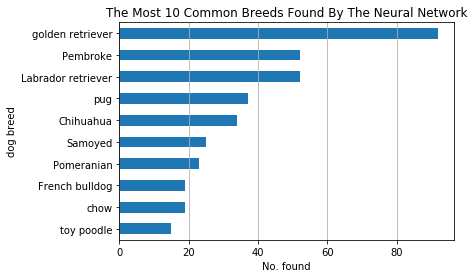

In [158]:
df_image_predictions_clean[filter1 & filter2].p1.value_counts()[:10].sort_values().plot(kind='barh', color=chart_color)

# setting grid 
plt.grid(axis='x')

# setting title
plt.title('The Most 10 Common Breeds Found By The Neural Network')

# setting x and y lable
plt.xlabel('No. found')
plt.ylabel('dog breed')

# ploting the chart on the screen
plt.show()

#### No. 1 Users's Favorite dog picture

In [167]:
top_favorite_tweet_id = df_archive_clean.iloc[df_archive_clean.favorite.idxmax()]['tweet_id']
top_favorite_picutre = df_image_predictions_clean.loc[df_image_predictions_clean['tweet_id'] == top_favorite_tweet_id]['jpg_url'].values[0]
Image(url=top_favorite_picutre, width=350)

<a id='store'></a>
## Data Storing

saving the cleaned dataframe to cleaned_data.csv on local disk

In [160]:
df_archive_clean.to_csv('data/archive_clean.csv', index=False)
df_image_predictions_clean.to_csv('data/image_predictions_clean.csv', index=False)